In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('train.tsv',delimiter='\t')

In [3]:
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [4]:
train.shape

(199, 10)

In [5]:
test=pd.read_csv('test.tsv',delimiter='\t')

In [6]:
test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,2,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,6,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)


In [7]:
train_ohe=pd.get_dummies(train)

In [8]:
train_ohe.head()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100.0,horsepower_105.0,...,car name_volkswagen model 111,car name_volkswagen rabbit custom diesel,car name_volkswagen rabbit l,car name_volkswagen scirocco,car name_volkswagen type 3,car name_volvo 144ea,car name_volvo 145e (sw),car name_vw dasher (diesel),car name_vw rabbit,car name_vw rabbit custom
0,0,29.0,4,135.0,2525.0,16.0,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,31.9,4,89.0,1925.0,14.0,79,2,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9,19.0,6,156.0,2930.0,15.5,76,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,28.0,4,90.0,2125.0,14.5,74,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,37.7,4,89.0,2050.0,17.3,81,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

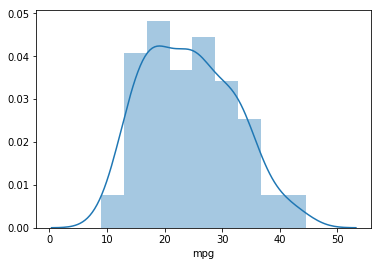

In [10]:
sns.distplot(train['mpg'])

In [11]:
correlation=train.corr()['mpg'].sort_values()

In [12]:
correlation

weight         -0.820660
displacement   -0.804635
cylinders      -0.770160
id             -0.052688
acceleration    0.379721
origin          0.533671
model year      0.568471
mpg             1.000000
Name: mpg, dtype: float64

In [13]:
train.describe()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,200.170854,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915
std,113.432759,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932
min,0.000000,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000
25%,98.500000,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000
50%,202.000000,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000
75%,294.500000,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000


In [14]:
df=train.append(test,sort='True')

In [15]:
df.head()

,acceleration,car name,cylinders,displacement,horsepower,id,model year,mpg,origin,weight
0,16.0,dodge aries se,4,135.0,84.00,0,82,29.0,1,2525.0
1,14.0,vw rabbit custom,4,89.0,71.00,3,79,31.9,2,1925.0
2,15.5,toyota mark ii,6,156.0,108.0,9,76,19.0,3,2930.0
3,14.5,dodge colt,4,90.0,75.00,11,74,28.0,1,2125.0
4,17.3,toyota tercel,4,89.0,62.00,13,81,37.7,3,2050.0


In [16]:
df_ohe=pd.get_dummies(df)

In [17]:
df_ohe.shape

(398, 407)

In [18]:
train.shape

(199, 10)

In [19]:
test.shape

(199, 9)

In [20]:
train['car name'].nunique()

167

In [21]:
test['car name'].nunique()

169

In [22]:
train_df=df_ohe[df_ohe['mpg'].notnull()]
test_df=df_ohe[df_ohe['mpg'].isnull()]

In [23]:
train_df.head()

,acceleration,cylinders,displacement,id,model year,mpg,origin,weight,car name_amc ambassador brougham,car name_amc ambassador dpl,...,horsepower_90.00,horsepower_91.00,horsepower_92.00,horsepower_93.00,horsepower_94.00,horsepower_95.00,horsepower_96.00,horsepower_97.00,horsepower_98.00,horsepower_?
0,16.0,4,135.0,0,82,29.0,1,2525.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.0,4,89.0,3,79,31.9,2,1925.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.5,6,156.0,9,76,19.0,3,2930.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.5,4,90.0,11,74,28.0,1,2125.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.3,4,89.0,13,81,37.7,3,2050.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
feats=[f for f in train_df.columns if f not in ['id','mpg']]

In [25]:
len(feats)

405

In [26]:
train_X=train_df[feats]
train_y=train_df['mpg']

In [27]:
test_X=test_df[feats]
test_y=test_df['mpg']

In [28]:
import lightgbm as lgb

In [29]:
lgb_train=lgb.Dataset(train_X,train_y)
lgb_test=lgb.Dataset(test_X,test_y)

In [30]:
params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : {'l2'},
        'num_leaves' : 31,
        'learning_rate' : 0.1,
        'feature_fraction' : 0.9,
        'bagging_fraction' : 0.8,
        'bagging_freq': 5,
        'verbose' : 0
}

In [31]:
gbm = lgb.train(params,
            lgb_train,
            num_boost_round=100)

In [32]:
y_pred = gbm.predict(test_X, num_iteration=gbm.best_iteration)

In [33]:
y_pred

array([27.70674228, 19.48700355, 33.55440874, 18.40438599, 27.10656452,
       23.86876722, 15.28871997, 20.71386689, 22.80165411, 21.6502391 ,
       13.51442152, 27.35592634, 13.51442152, 36.42843076, 33.28050659,
       15.95845146, 23.57298209, 21.54833438, 13.32364574, 30.81708457,
       25.00176539, 38.5304462 , 16.6086705 , 13.61330659, 17.07073316,
       13.61330659, 13.83718738, 20.18433963, 28.14778879, 29.849333  ,
       32.97135303, 18.22125133, 36.51712457, 13.45445956, 18.45802573,
       30.04746934, 32.44293515, 20.18253809, 27.93042745, 35.4922385 ,
       13.45445956, 29.62084928, 21.61247598, 30.32849704, 20.60654979,
       38.37890538, 34.40005515, 18.89683154, 23.68548949, 24.94849027,
       23.55616064, 25.59614677, 34.83852302, 17.76702869, 29.48866182,
       15.28871997, 14.73986172, 33.22780286, 13.50111551, 17.34444762,
       14.79982369, 26.17126474, 29.51518029, 16.16193883, 27.57628187,
       13.1081577 , 35.7911394 , 28.8123932 , 18.37816031, 14.33

In [34]:
sub=pd.DataFrame(test['id'])

In [35]:
sub['mpg']=y_pred

In [36]:
sub.head()

,id,mpg
0,1,27.706742
1,2,19.487004
2,4,33.554409
3,5,18.404386
4,6,27.106565


In [103]:
sub.to_csv('test_sub.csv',header=False,index=False)

In [37]:
train_df

,acceleration,cylinders,displacement,id,model year,mpg,origin,weight,car name_amc ambassador brougham,car name_amc ambassador dpl,...,horsepower_90.00,horsepower_91.00,horsepower_92.00,horsepower_93.00,horsepower_94.00,horsepower_95.00,horsepower_96.00,horsepower_97.00,horsepower_98.00,horsepower_?
0,16.0,4,135.0,0,82,29.0,1,2525.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.0,4,89.0,3,79,31.9,2,1925.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.5,6,156.0,9,76,19.0,3,2930.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.5,4,90.0,11,74,28.0,1,2125.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.3,4,89.0,13,81,37.7,3,2050.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,18.0,4,151.0,16,82,27.0,1,2735.0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,18.5,6,250.0,18,75,16.0,1,3897.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11.0,8,350.0,19,73,11.0,1,3664.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12.5,4,121.0,23,70,26.0,2,2234.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15.2,8,318.0,24,79,18.2,1,3830.0,0,0,...,0,0,0,0,0,0,0,0,0,0
